<a href="https://colab.research.google.com/github/asadullahhakim/DataExploratoryAnalysis/blob/main/DEA_pokemon_asad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. background
di notebook kali ini ku coba melakukan data exploratory analysis

untuk sumber data, ku mengacu pada
untuk frame dan guide pengerjaan, ku banyak mengacu kepada dokumentasi dari mas ali akbar (ex Data science eFishery
referensi dokumentasi lain ku mengacu pada workbook dari hao_zhang dan ashwini swain di kaggle

sumber data bisa ambil dari sini : https://www.kaggle.com/ash316/learn-pandas-with-pokemons

# 1. Load library nya dlu,


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict as dd

# 2. tarik/mining data



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pokemon.csv")

print(df)

       #                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 13 columns]


# 3. Mulai eksplor eksplor deskriptif data

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
df[df['HP']==1] #pokemon apa yg punya HP 1?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [ ]:
df[df['HP']==255] #pokemon apa yg punya HP terbesar (255)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [ ]:
df[df['Attack']==190] #pokemon apa yg punya atk terbesar (190)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
df[df['Defense']==230] #pokemon apa yg punya def terbesar (230)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [ ]:
df[df['Sp. Atk']==194] #pokemon apa yg punya Sp. Atk terbesar (194)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [ ]:
df[df['Sp. Def']==230] #pokemon apa yg punya Sp. Def (230)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


In [ ]:
df[df['Speed']==180] #pokemon apa yg punya speed terbesar (180)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


In [ ]:
df[df['Total']==780] #pokemon apa yg punya total terbesar (780)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [ ]:
df[df['Total']==180] #pokemon apa yg punya total terkecil (180)?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


In [ ]:
mega_evo = df[df['Name'].str.contains('Mega')]
print(mega_evo)

       #                       Name    Type 1  ... Speed  Generation  Legendary
3      3      VenusaurMega Venusaur     Grass  ...    80           1      False
7      6  CharizardMega Charizard X      Fire  ...   100           1      False
8      6  CharizardMega Charizard Y      Fire  ...   100           1      False
12     9    BlastoiseMega Blastoise     Water  ...    78           1      False
19    15      BeedrillMega Beedrill       Bug  ...   145           1      False
23    18        PidgeotMega Pidgeot    Normal  ...   121           1      False
71    65      AlakazamMega Alakazam   Psychic  ...   150           1      False
87    80        SlowbroMega Slowbro     Water  ...    30           1      False
102   94          GengarMega Gengar     Ghost  ...   130           1      False
124  115  KangaskhanMega Kangaskhan    Normal  ...   100           1      False
137  127          PinsirMega Pinsir       Bug  ...   105           1      False
141  130      GyaradosMega Gyarados     

In [ ]:
mega_evo = mega_evo[~mega_evo['Name'].str.contains('Meganium')]
print(mega_evo)

       #                       Name    Type 1  ... Speed  Generation  Legendary
3      3      VenusaurMega Venusaur     Grass  ...    80           1      False
7      6  CharizardMega Charizard X      Fire  ...   100           1      False
8      6  CharizardMega Charizard Y      Fire  ...   100           1      False
12     9    BlastoiseMega Blastoise     Water  ...    78           1      False
19    15      BeedrillMega Beedrill       Bug  ...   145           1      False
23    18        PidgeotMega Pidgeot    Normal  ...   121           1      False
71    65      AlakazamMega Alakazam   Psychic  ...   150           1      False
87    80        SlowbroMega Slowbro     Water  ...    30           1      False
102   94          GengarMega Gengar     Ghost  ...   130           1      False
124  115  KangaskhanMega Kangaskhan    Normal  ...   100           1      False
137  127          PinsirMega Pinsir       Bug  ...   105           1      False
141  130      GyaradosMega Gyarados     

In [ ]:
df.iloc[421:432]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
423,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
427,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True


In [ ]:
print(mega_evo.iloc[:,0])

3        3
7        6
8        6
12       9
19      15
23      18
71      65
87      80
102     94
124    115
137    127
141    130
154    142
163    150
164    150
196    181
224    208
229    212
232    214
248    229
268    248
275    254
279    257
283    260
306    282
327    302
329    303
333    306
336    308
339    310
349    319
354    323
366    334
387    354
393    359
397    362
409    373
413    376
418    380
420    381
426    384
476    428
494    445
498    448
511    460
527    475
591    531
796    719
Name: #, dtype: int64


In [ ]:
list(mega_evo.index)

[3,
 7,
 8,
 12,
 19,
 23,
 71,
 87,
 102,
 124,
 137,
 141,
 154,
 163,
 164,
 196,
 224,
 229,
 232,
 248,
 268,
 275,
 279,
 283,
 306,
 327,
 329,
 333,
 336,
 339,
 349,
 354,
 366,
 387,
 393,
 397,
 409,
 413,
 418,
 420,
 426,
 476,
 494,
 498,
 511,
 527,
 591,
 796]

# 4. Menbersihkan dan mensekupkan data yang akan dianalisis
dgn beberapa perlakuan sbb :
- hanya meninclude pokemon dari generasi 1,2, dan 3
- mengexclude data pokemon mega evolution (hati hati, meganium excluded)
- mengexclude data variasi pokemon lain : 1. primal kyogre 2. primal groudon 3. Deoxys forme (attack forme, defense forme, speed forme)*teks yang dimiringkan*

In [ ]:
df2 = df.drop([422,424,429,430,431])
df2 = df2.drop([3, 7, 8, 12, 19, 23, 71, 87, 102, 124, 137, 141, 154, 163, 164, 
                196, 224, 229, 232, 248, 268, 275, 279, 283, 306, 327, 329, 333, 
                336, 339, 349, 354, 366, 387, 393, 397, 409, 413, 418, 420, 426, 
                476, 494, 498, 511, 527, 591,796])
df2 = df2[df2['Generation'].isin([1,2,3])]

print(df2)

       #                Name   Type 1  ... Speed  Generation  Legendary
0      1           Bulbasaur    Grass  ...    45           1      False
1      2             Ivysaur    Grass  ...    60           1      False
2      3            Venusaur    Grass  ...    80           1      False
4      4          Charmander     Fire  ...    65           1      False
5      5          Charmeleon     Fire  ...    80           1      False
..   ...                 ...      ...  ...   ...         ...        ...
421  382              Kyogre    Water  ...    90           3       True
423  383             Groudon   Ground  ...    90           3       True
425  384            Rayquaza   Dragon  ...    95           3       True
427  385             Jirachi    Steel  ...   100           3       True
428  386  DeoxysNormal Forme  Psychic  ...   150           3       True

[386 rows x 13 columns]


# 5. Eksplor eksplor lagi

In [ ]:
#pokemon terkuat dari dataframe baru df2
df2[df2['Total'] == df2['Total'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True


In [ ]:
#pokemon terlemah dari dataframe baru df2
df2[df2['Total'] == df2['Total'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


In [ ]:
#ada berapa pokemon legendaris di df2
len(df2[df2['Legendary']])

19

In [ ]:
#pokemon legendaris itu persebaran tipe 1 apa aja?
df2[df2['Legendary']]['Type 1'].value_counts()

Dragon      3
Psychic     3
Fire        3
Ice         2
Steel       2
Water       2
Electric    2
Ground      1
Rock        1
Name: Type 1, dtype: int64

In [ ]:
#lihat seberapa OP sih legendaris vs pokemon biasa di stats HP mereka
df2.groupby('Legendary')['HP'].agg(['mean','median','std'])

,mean,median,std
Legendary,,,
False,64.907357,60,28.079554
True,92.000000,90,14.985178


In [ ]:
#lihat seberapa OP sih legendaris vs pokemon biasa di stats Total mereka
df2.groupby('Legendary')['Total'].agg(['mean','median','std'])

,mean,median,std
Legendary,,,
False,394.237057,405,99.274945
True,614.736842,600,44.016212


# 6. visualisasi data untuk membandingkan pokemon legend vs biasa

# 7. menjawab Soal dari teh salsa dan mas ali

### Soal 1

Gambarkan perbandingan distribusi Speed untuk Pokemon dari masing-masing generasi.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

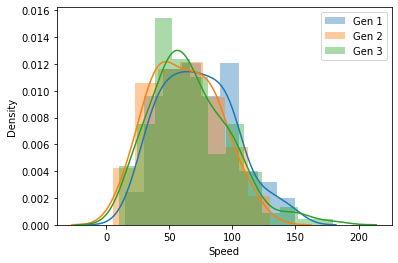

In [ ]:
sns.distplot(df[df['Generation'] == 1]['Speed'], label='Gen 1')
sns.distplot(df[df['Generation'] == 2]['Speed'], label='Gen 2')
sns.distplot(df[df['Generation'] == 3]['Speed'], label='Gen 3')
plt.ylabel('Density')
plt.legend()
plt.show()

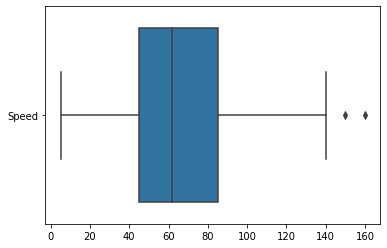

In [ ]:
sns.boxplot(data=df2[['Speed']], orient='h');

In [ ]:
df2.groupby('Generation')['Speed'].agg(['mean','median','std'])


,mean,median,std
Generation,,,
1,68.933775,70,26.746880
2,61.410000,60,27.242308
3,61.318519,60,26.734921


dari distribution plot dan hasil deskriptif data mean median diatas, kita dapat bahwa pokemon pokemon di gen 2 dan 3 cenderung mirip stats speed nya, dan cenderung berbeda dengan gen 1 yang memiliki stats "speed" lebih tinggi.

### Soal 2

Berapa persen Pokemon legendaris dengan tipe 1 *dragon* dari semua Pokemon *dragon* yang ada?

In [ ]:
df2.groupby('Type 1').count()

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Bug,34,34,25,34,34,34,34,34,34,34,34,34
Dark,9,9,5,9,9,9,9,9,9,9,9,9
Dragon,10,10,6,10,10,10,10,10,10,10,10,10
Electric,19,19,3,19,19,19,19,19,19,19,19,19
Fairy,7,7,1,7,7,7,7,7,7,7,7,7
Fighting,13,13,2,13,13,13,13,13,13,13,13,13
Fire,26,26,8,26,26,26,26,26,26,26,26,26
Ghost,8,8,3,8,8,8,8,8,8,8,8,8
Grass,33,33,20,33,33,33,33,33,33,33,33,33


In [ ]:
sns.countplot(y='Type 1', data=df2[df2['Legendary']==1,df2['Type 1']=='Dragon'], palette='hls');

TypeError: ignored

In [ ]:
df2[(df2['Type 1']=="Dragon")].describe

<bound method NDFrame.describe of        #       Name  Type 1   Type 2  ...  Sp. Def  Speed  Generation  Legendary
159  147    Dratini  Dragon      NaN  ...       50     50           1      False
160  148  Dragonair  Dragon      NaN  ...       70     70           1      False
161  149  Dragonite  Dragon   Flying  ...      100     80           1      False
365  334    Altaria  Dragon   Flying  ...      105     80           3      False
406  371      Bagon  Dragon      NaN  ...       30     50           3      False
407  372    Shelgon  Dragon      NaN  ...       50     50           3      False
408  373  Salamence  Dragon   Flying  ...       80    100           3      False
417  380     Latias  Dragon  Psychic  ...      130    110           3       True
419  381     Latios  Dragon  Psychic  ...      110    110           3       True
425  384   Rayquaza  Dragon   Flying  ...       90     95           3       True

[10 rows x 13 columns]>

In [ ]:
df2[(df2['Legendary']==1) & (df2['Type 1']=="Dragon")].describe

dari situ didapat bahwa perbandingan jumlah pokemon legendaris bertype 1 dragon dari semua pokemon dragon adalah 30%.

### Soal 3

Berapa banyak Pokemon yang tidak memiliki tipe 2?

In [ ]:
df2['Type 2'].isnull().sum()

204

In [ ]:
df2.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,193.500000,405.090674,66.240933,71.634715,68.696891,66.512953,67.683938,64.321244,1.958549
std,111.572846,108.356121,28.186696,28.433266,30.599530,27.587143,27.774296,27.056274,0.860892
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,97.250000,314.000000,50.000000,50.000000,48.250000,45.000000,50.000000,45.000000,1.000000
50%,193.500000,410.000000,63.000000,70.000000,65.000000,65.000000,65.000000,62.000000,2.000000
75%,289.750000,490.000000,80.000000,90.000000,85.000000,85.000000,80.000000,85.000000,3.000000
max,386.000000,680.000000,255.000000,160.000000,230.000000,154.000000,230.000000,160.000000,3.000000


In [ ]:
df2['Type 2'].describe()

count        182
unique        17
top       Flying
freq          50
Name: Type 2, dtype: object

In [ ]:
df2.groupby('Legendary').count()

In [ ]:
df2['Type 2'].isna().sum()

dari situ kita dapat bahwa pokemon yang memiliki Type 2 = 173 + 9 = 182. padahal total pokemon adalah 386. maka total value NA = 386 - 182 = 204

### Soal 4

Menggunakan pustaka scikit-learn untuk menghitung Euclidean distance, siapa Pokemon dengan atribut (di luar tipe, generasi, dan status legendaris) yang paling mirip dengan Pikachu?

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

df['euclidean_distance'] = euclidean_distances(df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']], Y=df[df['Name']=='Pikachu'][['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]).squeeze()

In [ ]:
df.sort_values(by='euclidean_distance')[1:2]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,euclidean_distance
65,60,Poliwag,Water,NaN,300,40,50,40,40,40,90,1,False,15.811388


belum tau caranya, tapi kayae gini deh stepnya, setelah baca baca :
1. bikin 1 variable baru yakni nilai np.array untuk tiap pokemon, dgn variable yg menentukannya adalah semua stats kecuali tipe, generasi, dan status legendaris. --> point = np.array((var 1, var 2, var 3))
2. lalu create 1 variable baru lagi yakni euclidean distance from pikachu, dgn formula --> dist = np.linalg.norm(pointpokemon X - point pikachu)
3. cari data dengan nilai variable distance terbesar, maka pokemon tersebut adalah pokemon dengan atribut yg paling mirip dengan pikachu